# 02. Global Analysis

This notebook focuses on worldwide COVID-19 trends, using aggregated data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
data_dir = "../archive"


Importing libraries and setting up...
Libraries imported.


## 1. Load Data

In [ ]:
day_wise = pd.read_csv(os.path.join(data_dir, "day_wise.csv"))
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

worldometer = pd.read_csv(os.path.join(data_dir, "worldometer_data.csv"))
print('Data loaded.')

Loading data...
Data loaded.


## 2. Global Trends Over Time

Plotting Global Trends...


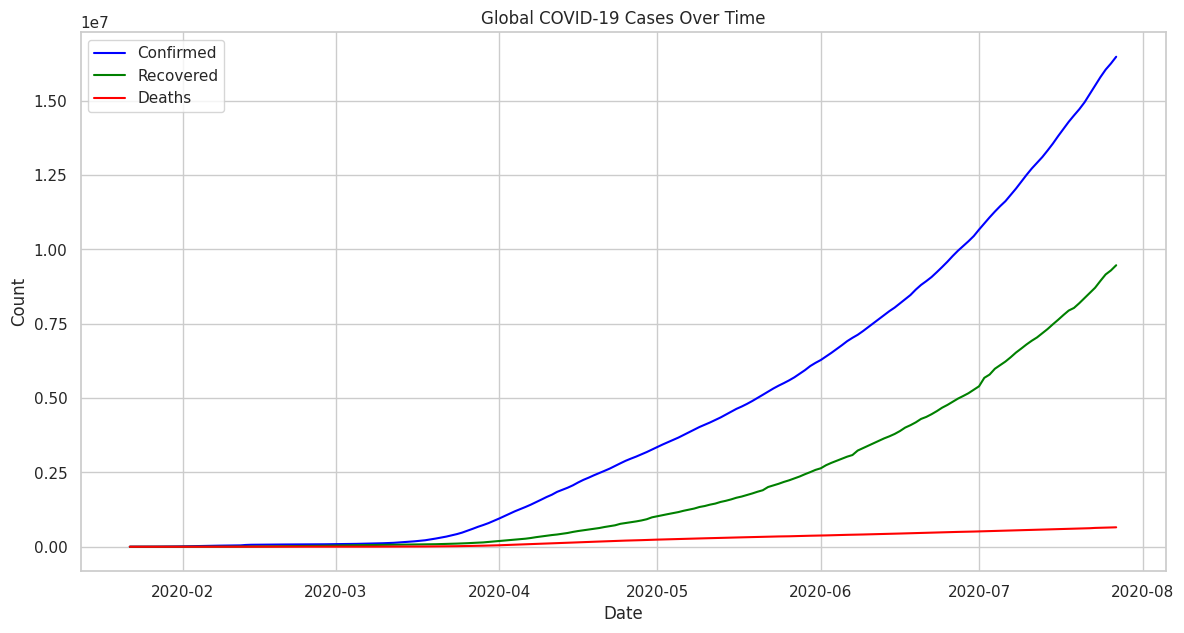

In [3]:
print('Plotting Global Trends...')
plt.figure(figsize=(14, 7))
plt.plot(day_wise['Date'], day_wise['Confirmed'], label='Confirmed', color='blue')
plt.plot(day_wise['Date'], day_wise['Recovered'], label='Recovered', color='green')
plt.plot(day_wise['Date'], day_wise['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

## 3. Daily New Cases

Plotting Daily New Cases...


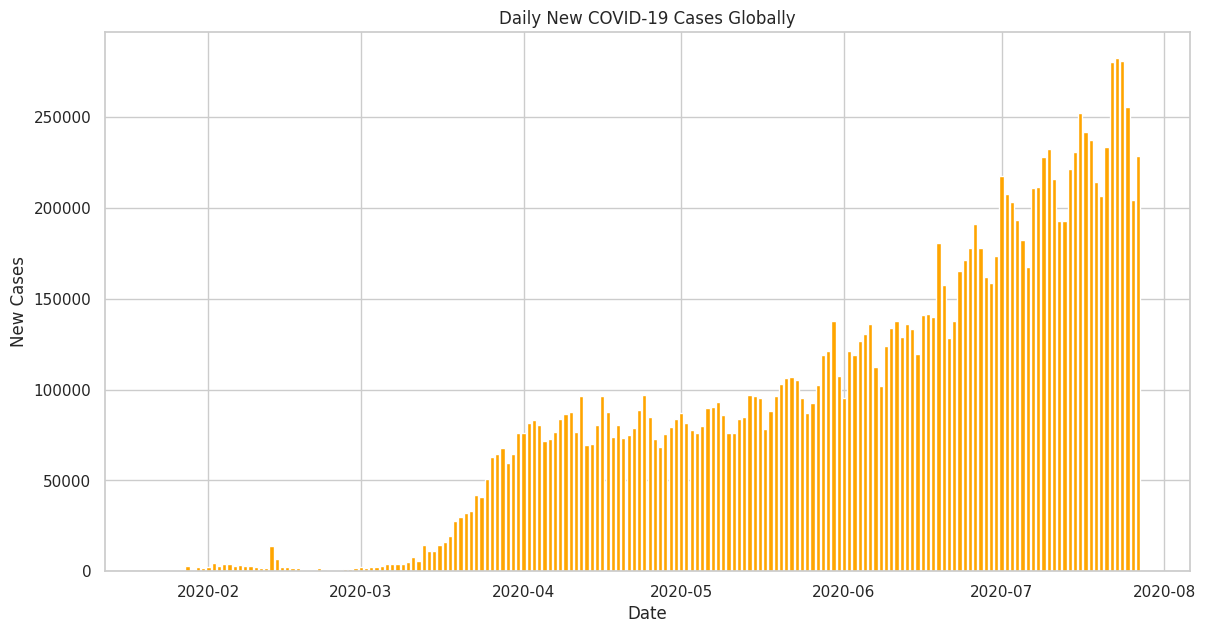

In [4]:
print('Plotting Daily New Cases...')
plt.figure(figsize=(14, 7))
plt.bar(day_wise['Date'], day_wise['New cases'], color='orange')
plt.title('Daily New COVID-19 Cases Globally')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

## 4. Correlation Heatmap
Exploring relationships between different metrics.

Generating Correlation Heatmap...


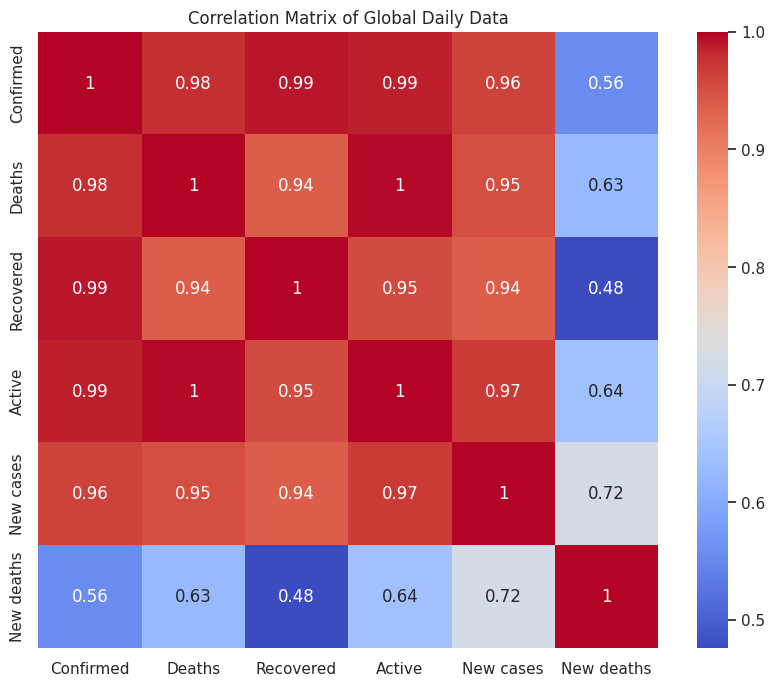

In [5]:
print('Generating Correlation Heatmap...')
plt.figure(figsize=(10, 8))
sns.heatmap(day_wise[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Global Daily Data')
plt.show()